# Basketball & Crime

## 1. Gather data

### **1.1.** Problem Statement

Connections have been made between sports and lower crime rates on a personal level, but I am wondering if a similar relationship is seen on a neighborhood level. I want to look at the relationship between availability of sports in a neighborhood and its crime rate. I will use the number of basketball courts available in a NYC borough, and the boroughs arrest rate to see if sports help lower a neighborhood's crime.

### **1.2.** Gathering

In [6]:
import pandas as pd
import numpy as np
import requests
from io import StringIO

#### **Directory of Basketball Courts**

Type: JSON

Method: API

Dataset variables:

*   Prop_ID: A unique identifier for the property. The first character is a abbreviation of the borough, followed by a 3 digit number. Anything after the first 4 characters represents a sub-property.
*   Location: The street address of the courts
*   Num_of_Courts: The number of courts at the property
*   Accessible: (Y)es or (N)o if the property is wheelchair accessible
*   lat: Latitude of the property
*   lon: Longitude of the proerty
ty

In [9]:
url = 'https://www.nycgovparks.org/bigapps/DPR_Basketball_001.json'
response = requests.get(url)
json_data = json.dumps(response.json())
bball_data = pd.read_json(StringIO(json_data))

bball_data.head()

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
0,X159,Captain William Harry Thompson Playground,E 174 St. & Bronx River Ave.,NaN,N,40.8342,-73.8775
1,X179,52 Playground,Kelly St. & Ave. St. John,NaN,N,40.8149,-73.9021
2,X216,Abigail Adams Playground,Tinton Ave. & E 156 St.,NaN,N,40.8172,-73.9044
3,X169,Agnes Haywood Playground,Barnes Ave. & E 215 St.,NaN,N,40.8804,-73.8619
4,X172,Allerton Playground,Bouck & Throop Aves.,NaN,N,40.8659,-73.8503


#### NYPD Arrest Data

Type: CSV

Method: Manual Download

Dataset Variables:

*   ARREST_KEY: Randomly generated persistent ID for each arrest
*   ARREST_DATE: Exact date of arrest for the reported event
*   PD_CD: Three digit internal classification code (more granular than Key Code)
*   PD_DESC: Description of internal classification corresponding with PD code (more granular than Offense Description)iKY_CD)Three digit internal classification code (more general category than PD code)
*   OFNS_DES: Description of internal classification corresponding with KY code (more general category than PD description)
*   LAW_CODE: Law code charges corresponding to the NYS Penal Law, VTL and other various local laws
*   LAW_CAT_CD: Level of offense: felony, misdemeanor, violation
*   ARREST_BORO: Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
*   ARREST_PRECINCT: Precinct where the arrest occurred
*   JURISDICTION_CODE: Jurisdiction responsible for arrest. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
*   AGE_GROUP: Perpetrator’s age within a category
*   PERP_SEX: Perpetrator’s sex description
*   PERP_RACE: Perpetrator’s race description
*   X_COORD_CD: Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
*   Y_COORD_CD: Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
*   Latitude: Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
*   Longitude: Longitude coordinate for Global Coordinate System, WGS 1984, decimal degees (EPSG 4326)
GS 1984, decimal degrees (EPSG 4326)

In [12]:
arrest_data = pd.read_csv('NYPD_Arrest_Data.csv')
arrest_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01/03/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01/03/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01/04/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01/07/2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


## 2. Assess data

### Quality Issue 1:

I'll start by looking at a few rows of the bball_data to see if anything sticks out.

In [17]:
bball_data.head()

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
0,X159,Captain William Harry Thompson Playground,E 174 St. & Bronx River Ave.,NaN,N,40.8342,-73.8775
1,X179,52 Playground,Kelly St. & Ave. St. John,NaN,N,40.8149,-73.9021
2,X216,Abigail Adams Playground,Tinton Ave. & E 156 St.,NaN,N,40.8172,-73.9044
3,X169,Agnes Haywood Playground,Barnes Ave. & E 215 St.,NaN,N,40.8804,-73.8619
4,X172,Allerton Playground,Bouck & Throop Aves.,NaN,N,40.8659,-73.8503


The first thing I noticed is that there are nulls in the Num_of_Courts column. I'll take a look to see how many there are.

In [20]:
bball_data['Num_of_Courts'].isna().sum()

434

There are 434 nulls in the Num_of_Courts column. I will need to take care of these null values to be able to run analysis on the data.

### Tidiness Issue 1:

Looking back at the variables, the Prop_ID has two variables in it: An abbreviation for the borough it is in, and a 3 digit number to identify the property.

In [25]:
bball_data.head()

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
0,X159,Captain William Harry Thompson Playground,E 174 St. & Bronx River Ave.,NaN,N,40.8342,-73.8775
1,X179,52 Playground,Kelly St. & Ave. St. John,NaN,N,40.8149,-73.9021
2,X216,Abigail Adams Playground,Tinton Ave. & E 156 St.,NaN,N,40.8172,-73.9044
3,X169,Agnes Haywood Playground,Barnes Ave. & E 215 St.,NaN,N,40.8804,-73.8619
4,X172,Allerton Playground,Bouck & Throop Aves.,NaN,N,40.8659,-73.8503


I will need to split this out into two columns in order to look at the data on a borough basis.

### Quality Issue 2:

Since I've seen the top of the DataFrame, I'll take a look at the end of it to see if there is anything else that stands out.

In [30]:
bball_data.tail(10)

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
564,X147A,Starlight Park,Sheridan Expressway & E. 174th St.,1.0,Y,40.8339,-73.8819
565,X307,Barretto Point Park,Viele Ave and Casanova St,2.0,N,NaN,NaN
566,B219,Callahan-Kelly Playground,Sackman St between Truxton St & Fulton St,3.0,None,40.6783,-73.9055
567,X092,Woodlawn Basketball Courts,Van Cortlandt Park East between Kepler Avenue ...,2.0,None,NaN,NaN
568,X092,Classic Playground Basketball Courts,Van Cortlandt Park South and Gouverneur Avenue,2.0,None,NaN,NaN
569,X019,Ewen Park,"Riverdale to Johnson avenues, south of West 23...",2.0,None,40.8831,-73.9099
570,X004,Olinville Playground,E. 219th Street & Bronx Blvd,1.0,Y,40.8837,-73.8672
571,R085,E.M.T. Christopher J. Prescott Playground,Edith Ave. at Irvington St.,1.0,None,40.5227,-74.1864
572,R106,Bloomingdale Park,"Richmond Pkwy., West Shore Expw., Lenevar Ave....",1.0,N,40.5351,-74.2102
573,R038,Midland Playground,"Mason Ave., Midland Ave",2.0,None,40.5751,-74.0989


One thing that stands out is that there are two records with the Prop_ID of 'X092'. It's possible there are multiple groups of courts on a single property, I want to take a look at the duplicates and see if anything stands out.

In [33]:
bball_data[bball_data['Prop_ID'].duplicated(keep=False)]

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
4,X172,Allerton Playground,Bouck & Throop Aves.,NaN,N,40.8659,-73.8503
11,X002,Brady Playground,Bronxdale Ave. & Bronx Pk E,NaN,N,40.8512,-73.8705
20,X010,Crotona Playground #11,Fulton Ave. between E 172 St. and Claremont,NaN,N,40.8384,-73.8993
21,X010,Crotona Playground #2,Crotona N between Marmion and Prospect,NaN,N,40.8402,-73.8913
22,X010,Crotona Playground #5,Crotona Pk E at E 173 St.,NaN,N,40.8377,-73.8908
...,...,...,...,...,...,...,...
550,Q205A,Big Bush Park,61st Street and Brooklyn Queens Expressway,1.0,None,NaN,NaN
551,Q014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN
552,Q014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN
567,X092,Woodlawn Basketball Courts,Van Cortlandt Park East between Kepler Avenue ...,2.0,None,NaN,NaN


There are 70 records with duplicate Prop_ID's, but the majority of them seem to be multiple courts on a single property. For example, the 'X010' Prop_ID has multiple Crotona Playgrounds at different locations. But looking at 'Q014', there seems to be two records with the same Prop_ID, name, and location. I want to take a look at all records that have those three columns duplicated.

In [36]:
bball_data[bball_data[['Prop_ID', 'Name', 'Location']].duplicated(keep=False)]

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon
549,Q205A,Big Bush Park,61st Street and Brooklyn Queens Expressway,1.0,None,NaN,NaN
550,Q205A,Big Bush Park,61st Street and Brooklyn Queens Expressway,1.0,None,NaN,NaN
551,Q014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN
552,Q014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN


This list of 4 records seems more accurate as to what should be considered duplicates. With the same Prop_ID, Name, and Location, they were likely to be double entries. I will want to remove one of each duplicates.

### Tidiness Issue 2: 

Looking at the arrest data, there is a lot of of columns that are related to the type of crime committed and not the arrest itself. For example: PD_CD, PD_DESC, OFNS_DES, and LAW_CODE all deal with the type of crime committed, its classification, and its description. These are things that could, and should, be stored in a separate table as they are a different observational unit. I will want to remove these columns from the dataFrame.

In [41]:
arrest_data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01/03/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01/03/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01/04/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01/07/2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


### Quality Issue 3: 

Before I move on, I want to look over the arrest data info to see if there is anything stands out as possibly being a problem.

In [45]:
arrest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128778 entries, 0 to 128777
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                128778 non-null  int64  
 1   ARREST_DATE               128778 non-null  object 
 2   PD_CD                     128774 non-null  float64
 3   PD_DESC                   128778 non-null  object 
 4   KY_CD                     128763 non-null  float64
 5   OFNS_DESC                 128778 non-null  object 
 6   LAW_CODE                  128778 non-null  object 
 7   LAW_CAT_CD                128008 non-null  object 
 8   ARREST_BORO               128778 non-null  object 
 9   ARREST_PRECINCT           128778 non-null  int64  
 10  JURISDICTION_CODE         128778 non-null  int64  
 11  AGE_GROUP                 128778 non-null  object 
 12  PERP_SEX                  128778 non-null  object 
 13  PERP_RACE                 128778 non-null  o

Looking at the LAW_CAT_CD column, there are nulls that will need to be dealt with. Let me look at the values counts in the column to see what exactly is going on.

In [48]:
arrest_data['LAW_CAT_CD'].value_counts(dropna=False)

LAW_CAT_CD
M         72080
F         54217
V          1236
NaN         770
9           362
I           109
(null)        4
Name: count, dtype: int64

There are four different value types that should not be there: NaN, 9, I, and (null). I will need to look and decide respecitvely what I should do for each of them. I'll start with the 9's

In [51]:
arrest_data[arrest_data['LAW_CAT_CD'] == '9']

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
372,280989258,01/23/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,113,3,<18,F,WHITE,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
444,279892603,01/03/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,113,3,25-44,M,WHITE HISPANIC,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
697,282263496,02/15/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,M,14,3,25-44,M,BLACK,986881,214802,40.756259,-73.990501,POINT (-73.990501 40.756259)
1639,281103899,01/25/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,25-44,F,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
2084,280712797,01/18/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,45-64,M,WHITE HISPANIC,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127080,289085054,06/25/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5701200,9,Q,102,0,25-44,M,BLACK,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)
127436,289053504,06/25/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,107,0,25-44,M,BLACK,1036628,204948,40.729059,-73.811018,POINT (-73.811018 40.729059)
127646,288488684,06/13/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC0000000,9,M,33,1,25-44,M,BLACK,1001891,245600,40.840781,-73.936245,POINT (-73.9362453818218 40.8407811088581)
128518,288379846,06/12/2024,849.0,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,CPL5700600,9,Q,102,0,45-64,F,WHITE,1032501,198800,40.712206,-73.825952,POINT (-73.825952 40.712206)


These all have a PD_DESC with the word Violation in them, so I will want to replace the 9 with a V. Now looking at I's...

In [54]:
arrest_data[arrest_data['LAW_CAT_CD'] == 'I']

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
1586,280209808,01/09/2024,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,M,13,0,25-44,M,BLACK HISPANIC,988971,207813,40.737074,-73.982962,POINT (-73.982962 40.737074)
1602,280927162,01/22/2024,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL0511A01,I,Q,109,0,45-64,M,WHITE HISPANIC,1032852,228739,40.794378,-73.824471,POINT (-73.82447061233147 40.79437808324494)
4134,280145933,01/08/2024,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,M,30,0,25-44,M,WHITE HISPANIC,999750,241187,40.828666,-73.943989,POINT (-73.943989 40.828666)
5587,280041976,01/05/2024,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL040201A,I,K,66,0,18-24,M,WHITE HISPANIC,984900,171853,40.638373,-73.997658,POINT (-73.99765797112055 40.638373320496456)
7629,280079204,01/06/2024,940.0,LEAVING THE SCENE / PROPERTY DAMAGE / INJURED ...,881.0,OTHER TRAFFIC INFRACTION,VTL060001A,I,M,30,0,25-44,M,WHITE HISPANIC,999750,241187,40.828666,-73.943989,POINT (-73.943989 40.828666)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127166,288537437,06/14/2024,965.0,FAIL TO STOP ON SIGNAL,880.0,MOVING INFRACTIONS,VTL117200A,I,K,75,0,<18,M,BLACK,1015878,182214,40.666758,-73.885989,POINT (-73.885989 40.666758)
127754,288786476,06/19/2024,968.0,UNLICENSED OPERATOR,880.0,MOVING INFRACTIONS,VTL0509001,I,M,23,2,18-24,M,BLACK HISPANIC,998191,227814,40.791962,-73.949653,POINT (-73.949653 40.791962)
127942,289292298,06/29/2024,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL1192AI1,I,B,50,0,25-44,M,BLACK,1010914,260940,40.882862,-73.903574,POINT (-73.9035744897024 40.8828621313214)
128197,288909265,06/21/2024,963.0,SPEEDING,880.0,MOVING INFRACTIONS,VTL118000D,I,K,63,0,25-44,M,WHITE,1000528,168138,40.628170,-73.941359,POINT (-73.9413587834752 40.6281697437036)


Looking at the OFNS_DESC, these are traffic infractions, or in other words, violations. Meaning I will also want to replace the I's with a V. Now looking at the (null)...

In [57]:
arrest_data[arrest_data['LAW_CAT_CD'] == '(null)']

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
6761,280961365,01/23/2024,NaN,(null),NaN,(null),(null),(null),M,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
67819,283941614,03/18/2024,NaN,(null),NaN,(null),(null),(null),K,67,0,25-44,M,BLACK,998216,176711,40.651696,-73.949669,POINT (-73.94966875535633 40.65169649424705)
95547,288234486,06/09/2024,NaN,(null),NaN,(null),(null),(null),Q,110,0,45-64,M,WHITE HISPANIC,1027349,214374,40.754981,-73.844435,POINT (-73.844435 40.754981)
128330,288286007,06/10/2024,NaN,(null),NaN,(null),(null),(null),M,18,0,25-44,M,WHITE,990156,215710,40.758751,-73.978681,POINT (-73.978681 40.758751)


These have no information about the crime type, and since there are only 4 instances of them, I will just drop these records.

Lastly, I'll look at the different types of crimes with a standard null value.

In [60]:
arrest_data[arrest_data['LAW_CAT_CD'].isna()]['PD_DESC'].value_counts()

PD_DESC
U.S. CODE UNCLASSIFIED             646
FUGITIVE/OTHER STATES               94
FUGITIVE/OTHER JURISDICTION NYS     19
NYS UNCLASSIFIED                     6
NYS PAROLE VIOLATION                 2
NYC UNCLASSIFIED WARRANT             1
F.C.A. ORDER OF PROTECTION           1
NYS PROBATION                        1
Name: count, dtype: int64

The majority of these are unclassified and a large amount of the others are for fugitives from other states/jurisdictions, which wouldn't fall into any of the types. Since all of these nulls make up around half of a percent of the total records, I will drop them to make analysis easier.

## 3. Clean data

I'll start my cleaning by creating copies of the raw data to work on.

In [65]:
clean_bball = bball_data.copy()
clean_arrest = arrest_data.copy()

### **Quality Issue 1: Nulls in Num_of_Courts**

The first thing I am going to deal with is the nulls in the Num_of_Courts field in the basketball court data. Since the records on are in the table, I know that they have at least 1 court for each of them. The question is whether I want to replace the nulls with 1, or choose a different number. From personal experience, I think it is common for parks and playgrounds to have 2 basketball courts, but I'll take a look at the statistics of what we do have to see what the numbers say.

In [69]:
clean_bball['Num_of_Courts'].describe()

count    140.000000
mean       2.100000
std        1.146154
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: Num_of_Courts, dtype: float64

The mean is slightly over 2, which fits with my anecdotal evidence. I think this is a fair and reasonable number to use as a replacement for the nulls. SO I will use the fillna() function to replace the nulls with the value of 2.

In [72]:
clean_bball['Num_of_Courts'] = clean_bball['Num_of_Courts'].fillna(2)

Now that that is done, I can confirm there are no more nulls using the below code.

In [75]:
clean_bball['Num_of_Courts'].isna().sum()

0

### **Tidiness Issue 1: Prop_ID 2 Variables**

Next, I am going to deal with the Prop_ID column. It has two variables in the one column: the borough and the property identifier. In order to do this, I will need to assign the first character in Prop_ID to a column for borough, and the remaining digits to the current property identifier (Prop_ID) column.

In [79]:
clean_bball['Borough'] = clean_bball['Prop_ID'].str[0]
clean_bball['Prop_ID'] = clean_bball['Prop_ID'].str[1:]

Now that it is done, I can look at a few of the records to confirm that those two columns exist as expected

In [82]:
clean_bball.head()

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon,Borough
0,159,Captain William Harry Thompson Playground,E 174 St. & Bronx River Ave.,2.0,N,40.8342,-73.8775,X
1,179,52 Playground,Kelly St. & Ave. St. John,2.0,N,40.8149,-73.9021,X
2,216,Abigail Adams Playground,Tinton Ave. & E 156 St.,2.0,N,40.8172,-73.9044,X
3,169,Agnes Haywood Playground,Barnes Ave. & E 215 St.,2.0,N,40.8804,-73.8619,X
4,172,Allerton Playground,Bouck & Throop Aves.,2.0,N,40.8659,-73.8503,X


### **Quality Issue 2: Duplicates**

I want to now deal with the duplicated rows. I'll look again at the properties that are duplicated.

In [86]:
clean_bball[clean_bball[['Borough', 'Prop_ID', 'Name', 'Location']].duplicated(keep=False)]

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon,Borough
549,205A,Big Bush Park,61st Street and Brooklyn Queens Expressway,1.0,None,NaN,NaN,Q
550,205A,Big Bush Park,61st Street and Brooklyn Queens Expressway,1.0,None,NaN,NaN,Q
551,014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN,Q
552,014,Astoria Heights Playground,Back of Horace Greeley Middle School (I.S. 10)...,2.0,None,NaN,NaN,Q


Now I will drop one of each of the duplicated records

In [89]:
clean_bball.drop_duplicates(subset=['Borough', 'Prop_ID', 'Name', 'Location'], inplace=True)

And I can run the previously used code again to confirm the duplicates are no longer there.

In [92]:
clean_bball[clean_bball[['Borough', 'Prop_ID', 'Name', 'Location']].duplicated(keep=False)]

,Prop_ID,Name,Location,Num_of_Courts,Accessible,lat,lon,Borough


### **Tidiness Issue 2: Multiple Obervational Units**

In the arrest data, I need to deal with the columns that are related to crime types. Since I will still want to be able to access the information if needed, I can't just drop the columns. I will want to create a new DataFrame for the crime types which can be referenced by the arrest table using a unique identifier.

So, I will start by creating a new DataFrame called crime_type with all the related columns.

In [96]:
crime_type = clean_arrest[['PD_CD', 'PD_DESC', 'OFNS_DESC', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD']].copy()
crime_type.head()

,PD_CD,PD_DESC,OFNS_DESC,KY_CD,LAW_CODE,LAW_CAT_CD
0,153.0,RAPE 3,RAPE,104.0,PL 1302503,F
1,105.0,STRANGULATION 1ST,FELONY ASSAULT,106.0,PL 1211200,F
2,109.0,"ASSAULT 2,1,UNCLASSIFIED",FELONY ASSAULT,106.0,PL 1201001,F
3,203.0,"TRESPASS 3, CRIMINAL",CRIMINAL TRESPASS,352.0,PL 140100A,M
4,223.0,"BURGLARY,RESIDENCE,NIGHT",BURGLARY,107.0,PL 1403002,F


That new DataFrame has the crime type information for each arrest, which means that there are going to be duplicates for each of them. I'll take a look to see how many there are.

In [99]:
crime_type.duplicated().sum()

127833

And I'll now get rid of the duplicate entries

In [102]:
crime_type.drop_duplicates(inplace=True)

And check to make sure it worked

In [105]:
crime_type.duplicated().sum()

0

Now that I have the crime type data safely stored in another DataFrame, I can remove it from the arrest data. But, I want to make sure to keep a unique identifier, so I can pull the crime type if needed. I will use the LAW_CODE column as this identifier as it is unique for each specific crime. This means I can drop the PD_CD, PD_DESC, OFNS_DESC, and KY_CD columns from the arrest data (I am going to leave the LAW_CAT_CD column in there for now as I may use it in my analysis).

In [108]:
clean_arrest.drop(['PD_CD', 'PD_DESC', 'OFNS_DESC', 'KY_CD'], axis=1, inplace=True)

And now I will just check the first few records to confirm that those columns have been dropped.

In [111]:
clean_arrest.head()

,ARREST_KEY,ARREST_DATE,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01/03/2024,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01/03/2024,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01/04/2024,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01/07/2024,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


### **Quality Issue 3: LAW_CAT_CD Wrong Values**

Now, I am going to update and remove records based on their LAW_CAT_CD value. I need to replace the 9's and I's with V's, and drop the rows with a value of '(null)' or are nulls.

I'll start with replacing the 9's and I's with V's. I am also going to replace the (null) values with actual nulls so I can easily drop them later.

In [115]:
clean_arrest['LAW_CAT_CD'] = clean_arrest['LAW_CAT_CD'].replace({'9': 'V', 'I': 'V', '(null)': np.nan})

Now I can drop the records with nulls in the LAW_CAT_CD column.

In [118]:
clean_arrest = clean_arrest.dropna(subset=['LAW_CAT_CD'])

And now I can confirm that there are only records with an M, F, or V in the LAW_CAT_CD column.

In [121]:
clean_arrest['LAW_CAT_CD'].value_counts(dropna=False)

LAW_CAT_CD
M    72080
F    54217
V     1707
Name: count, dtype: int64

### **Preparing Datasets**

Since I am wanting to look at data at a borough level, I will need to get the totals for the different boroughs. Starting with the basketball courts data, I will want to get a DataFrame that has each borough listed out, and the corresponding total number of courts in that borough. This can be done by running a groupby function on a slice of the clean_bball data that contains just the boroughs and number of courts.

In [125]:
courts_by_borough = clean_bball[['Borough', 'Num_of_Courts']].groupby(by=['Borough'], as_index=False).sum()
courts_by_borough.head()

,Borough,Num_of_Courts
0,B,363.0
1,M,232.0
2,Q,268.0
3,R,68.0
4,X,228.0


Lastly for this data, I am going to replace the borough abbreviations with their full names so it is easier to interpret when analyzing.

In [128]:
courts_by_borough.replace({'B': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'R': 'Staten Island', 'X': 'Bronx'}, inplace=True)
courts_by_borough

,Borough,Num_of_Courts
0,Brooklyn,363.0
1,Manhattan,232.0
2,Queens,268.0
3,Staten Island,68.0
4,Bronx,228.0


Next, I am going to want to get the number of arrests by borough, but since I am also interested in looking at the type of arrests, I will group by both boroughs and the level of offense. I'll do thise by first taking a slice of the clean_arrest data that has only the borough of the arrest, the level of offense, and the unique ID of each arrest. I will then groupby the borough and level of offense, aggregating with a count function. This will count the number of arrests per borough and offense level.

In [131]:
arrests_by_borough = clean_arrest[['ARREST_BORO', 'LAW_CAT_CD', 'ARREST_KEY']].groupby(by=['ARREST_BORO', 'LAW_CAT_CD'], as_index=False).count()
arrests_by_borough.head()

,ARREST_BORO,LAW_CAT_CD,ARREST_KEY
0,B,F,11748
1,B,M,16524
2,B,V,176
3,K,F,15944
4,K,M,19259


Now, to get the data to be in a similar format to the basketball courts data, and to make it easier to analyze, I need to pivot the data so I have the counts of arrests for each offense level as a column of their own. I'll use the pivot function with the borough as the index, the offense level as the columns, and the count of arrests as the values. I'll also use the reset_index function so the borough is brought over as a column and not the index.

In [134]:
arrests_by_borough = arrests_by_borough.pivot(index='ARREST_BORO', columns='LAW_CAT_CD', values='ARREST_KEY').reset_index()
arrests_by_borough

LAW_CAT_CD,ARREST_BORO,F,M,V
0,B,11748,16524,176
1,K,15944,19259,476
2,M,12375,17225,609
3,Q,11968,15650,437
4,S,2182,3422,9


Now I can get the total number of arrests by summing up the F, M, and V columns for each borough and assigning it to a Tot_Arrests column.

In [137]:
arrests_by_borough['Tot_Arrests'] = arrests_by_borough.iloc[:,1:4].sum(axis=1)
arrests_by_borough

LAW_CAT_CD,ARREST_BORO,F,M,V,Tot_Arrests
0,B,11748,16524,176,28448
1,K,15944,19259,476,35679
2,M,12375,17225,609,30209
3,Q,11968,15650,437,28055
4,S,2182,3422,9,5613


And to make things a little clearer, I am going to rename some columns.

In [140]:
arrests_by_borough.rename(columns={'ARREST_BORO': 'Borough', 'F': 'Tot_Felonies', 'M': 'Tot_Misdemeanors', 'V': 'Tot_Violations'}, inplace=True)
arrests_by_borough

LAW_CAT_CD,Borough,Tot_Felonies,Tot_Misdemeanors,Tot_Violations,Tot_Arrests
0,B,11748,16524,176,28448
1,K,15944,19259,476,35679
2,M,12375,17225,609,30209
3,Q,11968,15650,437,28055
4,S,2182,3422,9,5613


And lastly for this data, I will replace the borough abbreviations with their full names, similar to what I did in the bball data.

In [143]:
arrests_by_borough.replace({'K': 'Brooklyn', 'M': 'Manhattan', 'Q': 'Queens', 'S': 'Staten Island', 'B': 'Bronx'}, inplace=True)
arrests_by_borough

LAW_CAT_CD,Borough,Tot_Felonies,Tot_Misdemeanors,Tot_Violations,Tot_Arrests
0,Bronx,11748,16524,176,28448
1,Brooklyn,15944,19259,476,35679
2,Manhattan,12375,17225,609,30209
3,Queens,11968,15650,437,28055
4,Staten Island,2182,3422,9,5613


Now that I have the two DataFrames ready to go, I can merge them together.

In [146]:
borough_data = courts_by_borough.merge(arrests_by_borough, on='Borough')
borough_data

,Borough,Num_of_Courts,Tot_Felonies,Tot_Misdemeanors,Tot_Violations,Tot_Arrests
0,Brooklyn,363.0,15944,19259,476,35679
1,Manhattan,232.0,12375,17225,609,30209
2,Queens,268.0,11968,15650,437,28055
3,Staten Island,68.0,2182,3422,9,5613
4,Bronx,228.0,11748,16524,176,28448


And the last thing that I want to do is to include normalized data by the population of each borough. So, I'll start by adding a column to the DataFrame that has each boroughs' population, which I gathered manually from Wikipedia (source: https://en.wikipedia.org/wiki/Boroughs_of_New_York_City).

In [149]:
borough_data['Population'] = [1472654, 1694251, 2405464, 495747, 1472654]
borough_data

,Borough,Num_of_Courts,Tot_Felonies,Tot_Misdemeanors,Tot_Violations,Tot_Arrests,Population
0,Brooklyn,363.0,15944,19259,476,35679,1472654
1,Manhattan,232.0,12375,17225,609,30209,1694251
2,Queens,268.0,11968,15650,437,28055,2405464
3,Staten Island,68.0,2182,3422,9,5613,495747
4,Bronx,228.0,11748,16524,176,28448,1472654


I'm now going to create new columns for each of the variables that are normalized (and start with Norm_) by dividing each of them by the population divided by 1000, to get each variable per 1,000 people.

In [152]:
borough_data[[
        "Norm_Courts",
        "Norm_Felonies",
        "Norm_Misdemeanors",
        "Norm_Violations",
        "Norm_Arrests"
    ]] = borough_data.iloc[:,1:6].div(borough_data['Population']/1000, axis=0)

borough_data

,Borough,Num_of_Courts,Tot_Felonies,Tot_Misdemeanors,Tot_Violations,Tot_Arrests,Population,Norm_Courts,Norm_Felonies,Norm_Misdemeanors,Norm_Violations,Norm_Arrests
0,Brooklyn,363.0,15944,19259,476,35679,1472654,0.246494,10.826712,13.077749,0.323226,24.227687
1,Manhattan,232.0,12375,17225,609,30209,1694251,0.136934,7.304113,10.166734,0.359451,17.830298
2,Queens,268.0,11968,15650,437,28055,2405464,0.111413,4.975339,6.506021,0.181670,11.663031
3,Staten Island,68.0,2182,3422,9,5613,495747,0.137167,4.401439,6.902714,0.018154,11.322308
4,Bronx,228.0,11748,16524,176,28448,1472654,0.154823,7.977434,11.220558,0.119512,19.317504


And to finish it off, I'll drop the non-normalized versions of the variables, as well as the population.

In [155]:
borough_data.drop(borough_data.iloc[:,1:7].columns, axis=1, inplace=True)
borough_data

,Borough,Norm_Courts,Norm_Felonies,Norm_Misdemeanors,Norm_Violations,Norm_Arrests
0,Brooklyn,0.246494,10.826712,13.077749,0.323226,24.227687
1,Manhattan,0.136934,7.304113,10.166734,0.359451,17.830298
2,Queens,0.111413,4.975339,6.506021,0.181670,11.663031
3,Staten Island,0.137167,4.401439,6.902714,0.018154,11.322308
4,Bronx,0.154823,7.977434,11.220558,0.119512,19.317504


And now my data is ready to go!

## 4. Updating Data Store

The raw NYP arrest data was already stored as it was manually downloaded and imported, but I will stor the rest of my data as follows:

| Data | DataFrame Name | File Name |
|---|---|---|
| Raw basketball court data | bball_data | NYC_Basketball_Courts |
| Cleaned basketball court data | clean_bball | clean_basketball_courts_data |
| Cleaned arrests data | clean_arrest | clean_nypd_arrest_data |
| Cleaned data broken down by boroughs | borough_data | clean_data_by_borough |

In [160]:
bball_data.to_csv('NYC_Basketball_Courts.csv', index=False)
clean_bball.to_csv('clean_basketball_courts_data.csv', index=False)
clean_arrest.to_csv('clean_nypd_arrest_data.csv', index=False)
borough_data.to_csv('clean_data_by_borough.csv', index=False)

## 5. Answer the Research Question

### **5.1:** Define and Answer

*Research question:* Does the number of basketball courts in a borough effect the amount of crime in a positive way?

In [164]:
borough_data.head()

,Borough,Norm_Courts,Norm_Felonies,Norm_Misdemeanors,Norm_Violations,Norm_Arrests
0,Brooklyn,0.246494,10.826712,13.077749,0.323226,24.227687
1,Manhattan,0.136934,7.304113,10.166734,0.359451,17.830298
2,Queens,0.111413,4.975339,6.506021,0.181670,11.663031
3,Staten Island,0.137167,4.401439,6.902714,0.018154,11.322308
4,Bronx,0.154823,7.977434,11.220558,0.119512,19.317504


To start off, I want to look at the relationship of the main numbers: All Arrests and Basketball Courts. I'll create a scatter plot that plots these two variables to see if any relationship is visible.

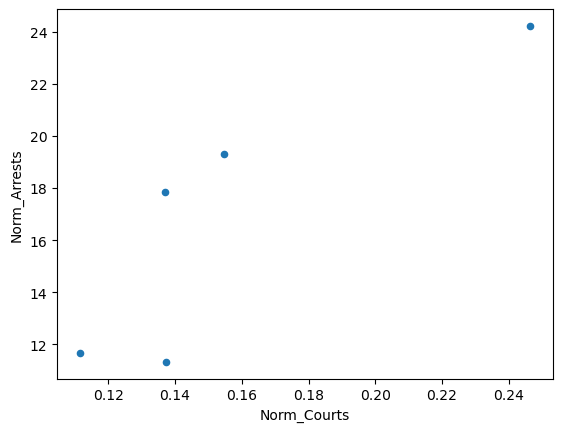

In [175]:
borough_data.plot('Norm_Courts', 'Norm_Arrests', kind='scatter');

This seems to be showing a fairly strong positive relationship between the two variables, but I'll check the correlation quickly to see if this is true.

In [178]:
borough_data['Norm_Courts'].corr(borough_data['Norm_Arrests'])

0.8623115171143605

Yes, a 0.86 correlation is implying a strong relationship. But is this relationship across all types of arrests, or is one skewing the data? I'll plot the individual level of offenses against the number of basketball courts to see the individual relationships.

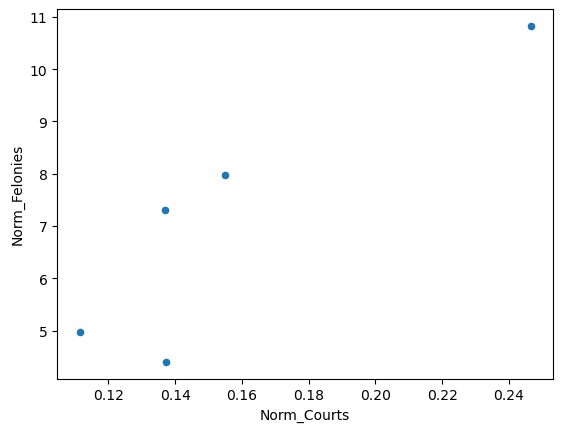

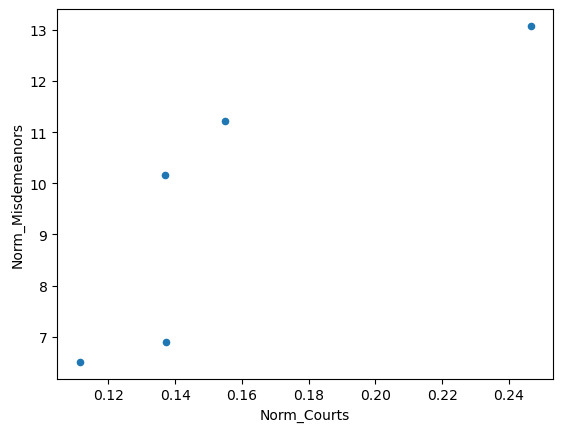

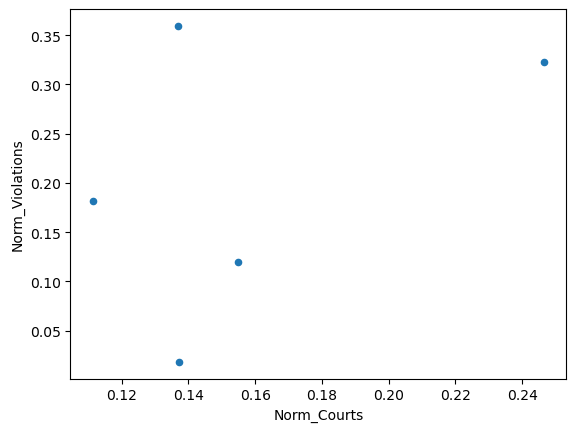

In [181]:
for col in borough_data.iloc[:,2:5]:
    borough_data.plot('Norm_Courts', col, kind='scatter');

The number of felonies and misdemeanors look to have a similar relationship as total arrests, but the number of violations appears to be a bit more random. I'll look at their correlations as well to get actual numbers on it.

In [184]:
borough_data.iloc[:,1:5].corr()['Norm_Courts']

Norm_Courts          1.000000
Norm_Felonies        0.889770
Norm_Misdemeanors    0.833191
Norm_Violations      0.420401
Name: Norm_Courts, dtype: float64

These numbers track with what the scatter plots looked like. The number of felonies and misdemeanors had a high positive correlation with the number of basketball courts, 0.89 and 0.83, respectively. While the number of violations and the number of basketball courts' correlation was less so at 0.42. This is still a positive correlation, but not as strong as the others.

#### *Answer to Research Question:*
I originally proposed an idea that more basketball courts could be related to lower crime rates. The relatively high postive correlation between the number of felonies, misdemeanors, and total arrests and the number of basketball courts seems to indicate the opposite may be true.

### **5.2:** Reflection

If I were to dig deeper on this subject I would look at breaking the geographic areas down into smaller groups based on zipcode to get a more localized result. I think this would give a better idea of how accessible (i.e. close) basketball courts are to the people in the geographic area. I would also want to look at other demographics that could playing a factor in the correlation (e.g. income/poverty level) and try to control for them.